# Kernel Methods

In this we need to do 2 things to properly classify our data
- Feature Transformation
- Using Kernel Method on transformed feature

The idea is to use a higher-dimension feature space to make the data almost linearly separable.<br>
The magic of the kernel is to find a function that avoids all the trouble implied by the high-dimensional computation. The result of a kernel is a scalar, or said differently we are back to one-dimensional space<br>
After you found this function, you can plug it to the standard linear classifier.<br>


# Example

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

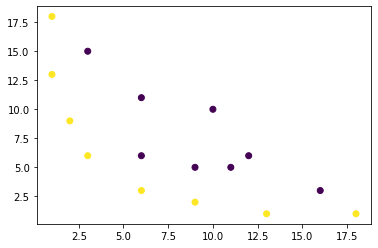

In [23]:
# Our data
x = np.array([1,1,2,3,3,6,6,6,9,9,10,11,12,13,16,18])
y = np.array([18,13,9,6,15,11,6,3,5,2,10,5,6,1,3,1])
label = np.array([1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1])
plt.scatter(x,y, c = label)
plt.show()

This data is not linearly separable so we can transform it into 3d space where it can be separable.

we can use the following transformation<br>
$\phi(x,y) = (x^2, \sqrt{2}xy, y^2)$

In [26]:
def transform(x,y):
    x_trns = x**2
    y_trns = np.sqrt(2)*x*y
    z_trns = y**2
    return x_trns,y_trns,z_trns

In [27]:
x_trns, y_trns, z_trns = transform(x,y)
print(x_trns)
print(y_trns)
print(z_trns)

[  1   1   4   9   9  36  36  36  81  81 100 121 144 169 256 324]
[ 25.45584412  18.38477631  25.45584412  25.45584412  63.63961031
  93.33809512  50.91168825  25.45584412  63.63961031  25.45584412
 141.42135624  77.78174593 101.82337649  18.38477631  67.88225099
  25.45584412]
[324 169  81  36 225 121  36   9  25   4 100  25  36   1   9   1]


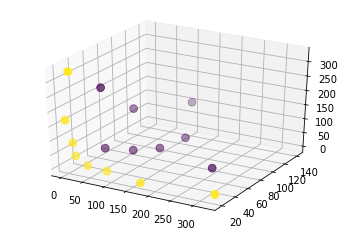

In [28]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_trns, y_trns, z_trns, c=label, s=60)
plt.show()

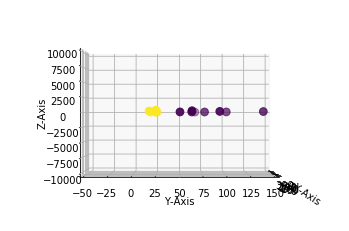

In [29]:
# re-orienting the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_trns, y_trns, z_trns, c= label, s=60)
ax.view_init(0, -180)
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
ax.set_ylim([150,-50])
ax.set_zlim([-10000,10000])
plt.show()

Now we can see that in this transformation a logistic regression will work perfectly fine. But as we usually dont have such simple data and we have multiple features, thus transforming into higher dimension is neither feasible nor visualizable to say the least.

In machine learning, a “kernel” is usually used to refer to the kernel trick, a method of using a linear classifier to solve a non-linear problem. It entails transforming linearly inseparable data like to linearly separable ones. The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable.

# Mathematical Explanation

Mathematical definition: K(x, y) = <f(x), f(y)>. Here K is the kernel function, x, y are n dimensional inputs. f is a map from n-dimension to m-dimension space. < x,y> denotes the dot product. usually m is much larger than n.

Intuition: normally calculating <f(x), f(y)> requires us to calculate f(x), f(y) first, and then do the dot product. These two computation steps can be quite expensive as they involve manipulations in m dimensional space, where m can be a large number. But after all the trouble of going to the high dimensional space, the result of the dot product is really a scalar: we come back to one-dimensional space again! Now, the question we have is: do we really need to go through all the trouble to get this one number? do we really have to go to the m-dimensional space? The answer is no, if you find a clever kernel.

A very simple and intuitive way of thinking about kernels is a similarity function. Given two objects, the kernel outputs some similarity score. The objects can be anything starting from two integers to two real valued vectors.

<b>The arguably simplest example is the linear kernel, also called dot-product. Given two vectors, the similarity is the length of the projection of one vector on another.</b>

<b>Another interesting kernel examples is Gaussian kernel. Given two vectors, the similarity will diminish with the radius of σ. The distance between two objects is "reweighted" by this radius parameter.<b>

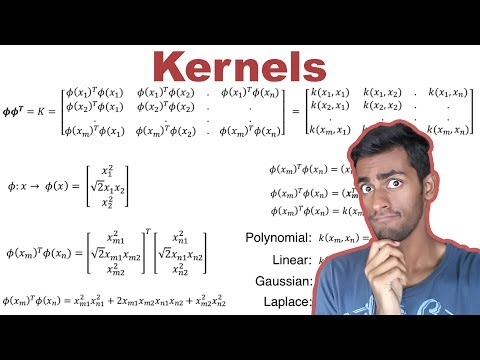

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("wBVSbVktLIY", width= 640, height = 480)

# Using Gaussian Kernel

$e \frac{-\lvert x-y\rvert^2}{2\sigma^2}$

We have the following variables in our dataset
- age
- workclass
- fnlwgt
- education
- education_num
- marital
- occupation
- relationship
- race
- sex
- capital_gain
- capital_loss
- hours_week
- native_country
- label

## Step1: import libraries

In [48]:
import tensorflow.compat.v1 as tf
import pandas as pd
import numpy as np   # numpy is required for StandardScaler to work
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
tf.disable_v2_behavior()
tf.disable_eager_execution()
print(tf)

ModuleNotFoundError: No module named 'tens'

## Step2: import dataset

In [2]:
train_data_path = 'data/sensus_data/adult.data'
test_data_path = 'data/sensus_data/adult.test'
COLUMNS = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_week', 'native_country', 'label']
CONTI_FEATURE = ['age','fnlwgt','education_num','capital_gain', 'capital_loss', 'hours_week']
CAT_FEATURE = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex', 'native_country']
df_train = pd.read_csv(train_data_path, skipinitialspace=True, names = COLUMNS, index_col=False)
df_test = pd.read_csv(test_data_path, skiprows = 1, skipinitialspace=True, names = COLUMNS, index_col=False)
display(df_train.head(5))
display(df_test.head(5))
print(df_train.shape)
print(df_test.shape)

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


(32561, 15)
(16281, 15)


In [5]:
#changing label to 0 and 1
df_train['label'] = df_train['label'].map({'<=50K':0,'>50K':1})
df_test['label'] = df_test['label'].map({'<=50K.':0, '>50K.':1})
display(df_train.head(5))
display(df_test.head(5))
display(df_train.shape)
display(df_test.shape)

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


(32561, 15)

(16281, 15)

## step 3: Pre-Process the data

In [6]:
#Pre-Process the data
def prep_data(df, categorical_features, continuous_features, label):
    scalar = StandardScaler()
    le = LabelEncoder()
    df_scaled = scalar.fit_transform(df[continuous_features].astype(np.float64))
    X_1 = df[categorical_features].apply(le.fit_transform)
    y = df[label].astype(np.float32)
    x_conc = np.c_[df_scaled, X_1].astype(np.float32)   # here in place of storing our data as pandas data-frame we r taking a different route and storing it as numpy array
    return x_conc, y

In [7]:
X_train, Y_train = prep_data(df_train, CAT_FEATURE, CONTI_FEATURE, 'label')
X_test, Y_test = prep_data(df_test, CAT_FEATURE, CONTI_FEATURE, 'label')
display(X_train.shape)
display(X_test.shape)

(32561, 14)

(16281, 14)

## Step4: Construct the model(Benchmark Model)

No we create feature column for the model, as the data is numpy array data thus creating basic 14 dense feature column

In [39]:
# Create feature columns
features = [tf.feature_column.numeric_column('features', shape=X_train.shape[1])]

In [40]:
model = tf.estimator.LinearClassifier(feature_columns=features,
                                     n_classes=2,
                                     model_dir='logs/10_linear_classifier_benchmark')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logs/10_linear_classifier_benchmark', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f14ee4d95d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
def get_input_fn(x_ndarray, y_ndarray, num_epochs = None):
    return tf.estimator.inputs.numpy_input_fn(x = {'features':x_ndarray},
                                             y = y_ndarray,
                                             batch_size=200,
                                             num_epochs=num_epochs,
                                             shuffle=True)

In [45]:
!rm -rf logs/10_linear_classifier_benchmark
model.train(input_fn=get_input_fn(X_train, Y_train, None), steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into logs/10_linear_classifier_benchmark/model.ckpt.
INFO:tensorflow:loss = 138.62949, step = 1
INFO:tensorflow:global_step/sec: 583.85
INFO:tensorflow:loss = 74.08616, step = 101 (0.173 sec)
INFO:tensorflow:global_step/sec: 626.379
INFO:tensorflow:loss = 68.50006, step = 201 (0.161 sec)
INFO:tensorflow:global_step/sec: 331.443
INFO:tensorflow:loss = 100.05919, step = 301 (0.306 sec)
INFO:tensorflow:global_step/sec: 513.253
INFO:tensorflow:loss = 78.076866, step = 401 (0.191 sec)
INFO:tensorflow:global_step/sec: 610.541
INFO:tensorflow:loss = 72.09409, step = 501 (0.163 sec)
INFO:tensorflow:global_step/sec: 583.909
INFO:tensorflow:loss = 79.31186, step = 601 (0.172 sec)
INFO:tensorflow:global_step/sec: 620.764
IN

In [46]:
model.evaluate(input_fn=get_input_fn(X_test, Y_test, num_epochs = 1), steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-18T21:23:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/10_linear_classifier_benchmark/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-18-21:23:42
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8238437, accuracy_baseline = 0.76377374, auc = 0.8495651, auc_precision_recall = 0.67344284, average_loss = 0.38543344, global_step = 1000, label/mean = 0.23622628, loss = 76.527336, precision = 0.6792522, prediction/mean = 0.25162047, recall = 0.48179927
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: logs/10_linear_classifier_benchmark/model.ckpt-1000


{'accuracy': 0.8238437,
 'accuracy_baseline': 0.76377374,
 'auc': 0.8495651,
 'auc_precision_recall': 0.67344284,
 'average_loss': 0.38543344,
 'label/mean': 0.23622628,
 'loss': 76.527336,
 'precision': 0.6792522,
 'prediction/mean': 0.25162047,
 'recall': 0.48179927,
 'global_step': 1000}

We can see that linear classifier has an accuracy of 82%.

## Step5: Create Kernel Classifier

You need two pre-defined estimators available in TensorFlow to train the Kernel Classifier:
- RandomFourierFeatureMapper
- KernelLinearClassifier

To build the model, you will follow these steps:
- Set the high dimension Kernel function
- Set the L2 hyperparameter
- Build the model
- Train the model
- Evaluate the model

In [1]:
# using fourier features, it is very similar to the gaussian kernel function
# it had a standard deviation parameter, setting it to 4
# rest of the code depends on the 'contrib' module 
# so leaving the rest of the code incomplete to revisit again when i get the re-factored code
kernel_mapper = 

SyntaxError: invalid syntax (<ipython-input-1-72857ceb3898>, line 4)